In [45]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Data preparation

In [46]:
from sklearn.datasets import make_blobs

In [47]:
X,Y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

In [48]:
Y[:5]

array([3, 2, 1, 3, 3])

In [49]:
print(X.shape,Y.shape)

(500, 2) (500,)


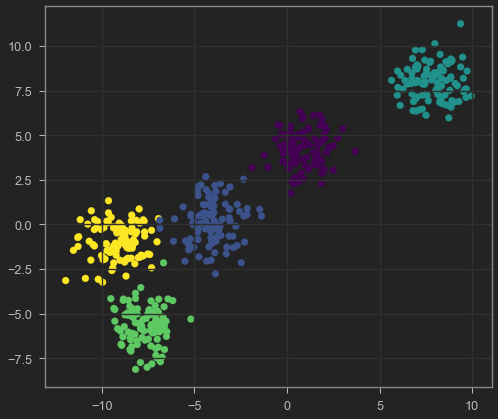

In [50]:
plt.scatter(X[:,0],X[:,1],c=Y)
#plt.axis("off")
plt.show()

In [51]:
k=5
color=['green','red','blue','yellow','orange']
clusters={}
for i in range(k):
    center=10*(2*np.random.random((X.shape[1],))-1)
    points=[]
    cluster= {
    
        'center':center,
        'points':points,
        'color':color[i]
    }
    clusters[i]=cluster


In [52]:
clusters

{0: {'center': array([ 0.30114479, -6.87052128]),
  'points': [],
  'color': 'green'},
 1: {'center': array([4.03454207, 6.95220548]), 'points': [], 'color': 'red'},
 2: {'center': array([ 6.52185235, -3.89498182]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([ 1.87563399, -2.32027307]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([ 0.040272  , -1.04099542]),
  'points': [],
  'color': 'orange'}}

In [53]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [54]:
def E_step(clusters):
    for ix in range(X.shape[0]):
        dist=[]
        curr_x=X[ix]
        for kx in range(k):
            d=distance(curr_x,clusters[kx]['center'])
            dist.append(d)
        current_cluster=np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)
        
def plotclusters(clusters):
    
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
    
        uk=clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color='white',marker='v')

In [56]:
def update_M_step(clusters):
    
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        if(pts.shape[0]>0):
            new_u=pts.mean(axis=0)
            clusters[kx]['center']=new_u
            clusters[kx]['points']=[]

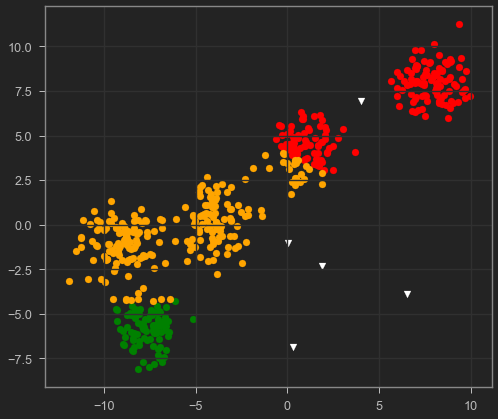

In [57]:
# Iteration 1
E_step(clusters)
plotclusters(clusters)
update_M_step(clusters)

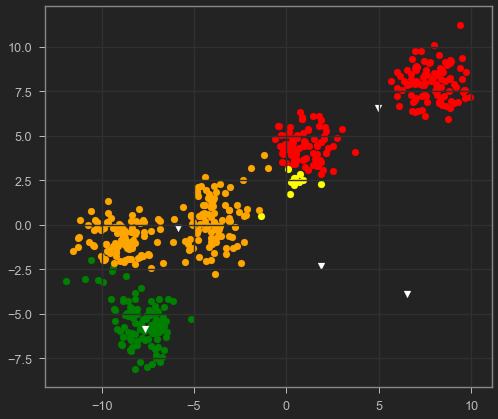

In [58]:
# Iteration 2
E_step(clusters)
plotclusters(clusters)
update_M_step(clusters)

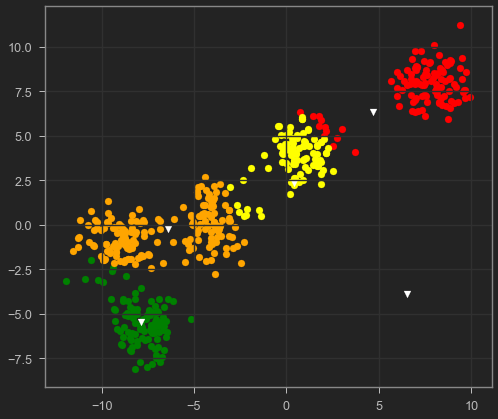

In [59]:
# Iteration 3
E_step(clusters)
plotclusters(clusters)
update_M_step(clusters)

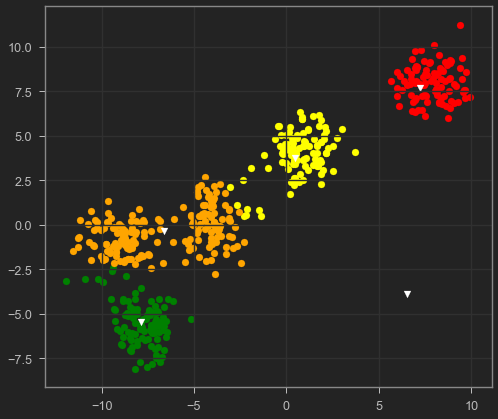

In [60]:
# Iteration 4
E_step(clusters)
plotclusters(clusters)
update_M_step(clusters)

#### - You can see the last point has not been assigned to any clusters
#### - Which means this point is strucked into some local minima
#### - which is why random initialization is not a good thing
#### - so we will use K-Means++

### using Sci-Kit learn

In [61]:
from sklearn.cluster import KMeans

In [62]:
kmeans=KMeans(n_clusters=5)

In [63]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [66]:
center=kmeans.cluster_centers_
print(center)

[[ 0.88641907  4.19441853]
 [-9.0671623  -0.96740759]
 [ 7.8649674   7.97988109]
 [-3.97953526  0.19458336]
 [-7.6726196  -5.69211059]]


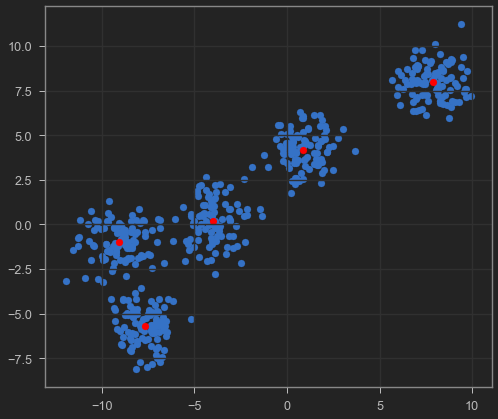

In [67]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(center[:,0],center[:,1],color='red')
plt.show()

In [70]:
pred=kmeans.labels_
print(pred)

[4 2 3 4 4 3 1 4 2 4 2 3 2 4 3 4 2 4 4 2 0 0 4 3 4 0 1 1 3 1 4 1 0 0 4 0 2
 2 4 0 0 0 1 1 3 2 2 1 1 1 2 4 1 4 4 0 4 4 2 3 2 3 3 4 1 2 3 3 0 3 0 4 0 4
 0 3 4 1 0 0 3 0 3 1 2 1 3 2 1 3 1 0 4 0 0 2 4 3 3 0 2 0 3 3 2 2 2 3 3 4 2
 1 4 2 3 0 2 1 0 3 2 3 1 4 0 1 1 1 4 4 3 3 4 2 2 1 3 1 3 4 4 0 3 2 1 4 2 2
 4 3 4 4 3 3 2 0 0 1 3 4 0 2 1 0 2 0 2 0 0 0 1 4 0 2 0 1 4 3 2 1 2 4 2 0 1
 1 0 4 3 2 0 3 1 4 1 0 3 1 4 4 4 0 0 2 4 1 1 4 2 4 4 4 0 2 3 2 4 4 2 1 3 1
 1 0 4 3 4 3 1 0 3 3 4 0 4 0 3 2 3 0 0 2 4 4 3 3 0 2 0 4 1 2 1 4 1 1 1 1 2
 0 2 4 0 2 1 3 2 2 2 1 4 4 3 0 0 2 3 3 4 3 1 3 2 2 1 1 0 1 1 2 0 4 3 0 3 1
 3 3 2 4 0 2 0 0 4 1 0 3 0 1 4 4 3 2 0 1 2 0 3 1 2 1 4 0 1 3 3 0 0 0 4 1 0
 4 2 3 3 1 2 2 3 3 1 0 0 0 4 1 2 1 4 0 2 2 3 0 0 1 0 1 3 3 3 1 0 4 0 3 1 1
 2 4 2 1 4 1 3 2 0 2 3 4 4 2 2 0 2 0 1 3 2 1 4 4 2 3 0 1 4 4 4 1 2 0 2 2 2
 1 0 3 2 3 3 1 3 4 3 4 2 0 0 4 2 1 4 0 3 2 1 3 1 1 2 1 3 1 2 1 3 1 4 0 0 1
 0 2 0 0 1 4 4 3 1 0 3 1 3 2 3 2 4 0 3 4 3 4 4 0 4 0 1 2 2 3 4 4 1 1 2 1 1
 2 1 2 2 2 1 0 1 3 2 3 3 

### K-Means++ Can Also Fail

In [71]:
from sklearn.datasets import make_circles,make_moons

In [72]:
X,Y=make_moons(n_samples=200,noise=0.10)

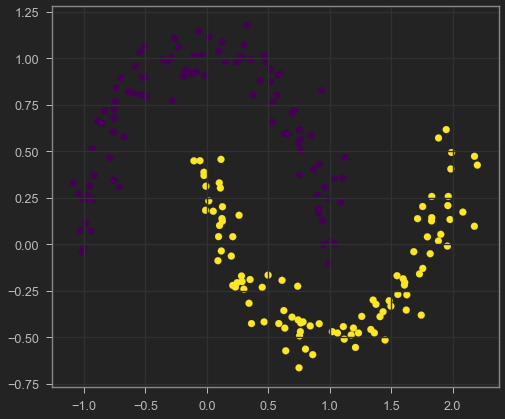

In [74]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

### 1. Using K-Means++

In [75]:
km=KMeans(n_clusters=2)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

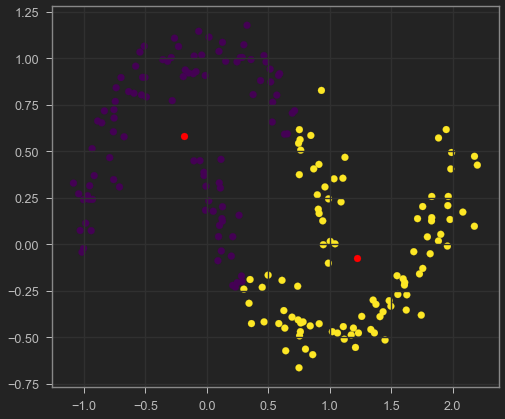

In [77]:
centers=km.cluster_centers_
label=km.labels_
plt.scatter(X[:,0],X[:,1],c=label)
plt.scatter(centers[:,0],centers[:,1],c='red')
plt.show()

### Using DBSCAN
- Density Based Spatial Clustering of Application with Noise
- Based upon on the idea, that a cluster is a high density area surrounded by low density region 

In [78]:
from sklearn.cluster import DBSCAN

In [83]:
dbs=DBSCAN(eps=0.2,min_samples=5)

In [84]:
dbs.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [85]:
Y_pred=dbs.fit_predict(X)

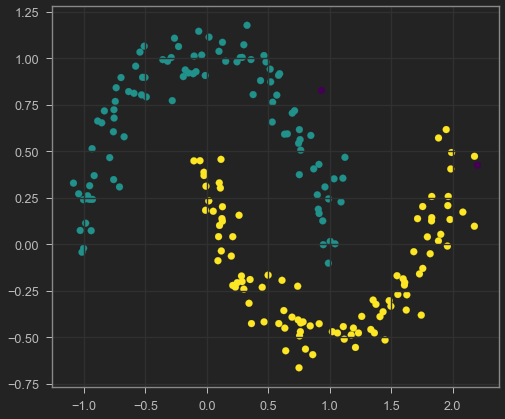

In [87]:
plt.scatter(X[:,0],X[:,1],c=Y_pred)
plt.show()

### This is better prediction